# 🚀 Objective: Gaussian Naive Bayes Implementation
# 💡 Own Code: Python Implementation for Digesting Concept
# 🎯 Purpose: Mastering the Essence of Naive Bayes!

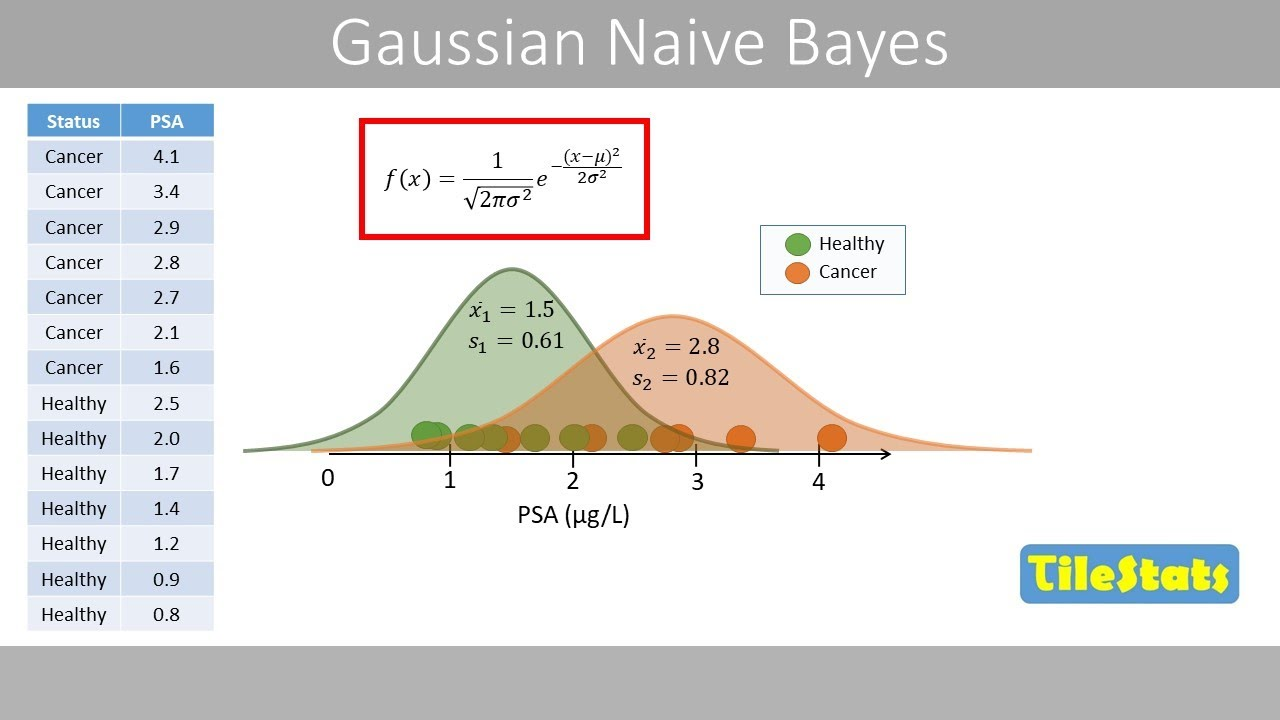

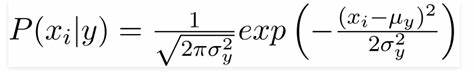

# Gaussian Naive Bayes:
- Gaussian Naive Bayes is the application of Naive Bayes on a normally distributed data

- Spl Thanks(Credits)
https://www.geeksforgeeks.org/gaussian-naive-bayes/

# 1. Load Python Modules

In [21]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# 2. Read the Dataset from CSV file  - Using Pandas

In [22]:
# Load the Iris dataset
data = pd.read_csv("Iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 3. Basic Inspection on given dataset

In [23]:
data["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [24]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# 4. Implementation of the own code - using python

In [25]:
species_data = {}
for var in data["species"].unique():
    species_data[var] = data[data["species"]==var]

In [26]:
# Initialize dictionaries to store mean and standard deviation for each feature and species
mean_values = {}
std_values = {}

# Iterate over each feature
for feature in ["sepal_length", "sepal_width", "petal_length", "petal_width"]:
    # Initialize dictionaries for the current feature
    mean_values[feature] = {}
    std_values[feature] = {}
    
    # Iterate over each species
    for species in species_data.keys():
        # Calculate mean and standard deviation for the current feature and species
        mean_values[feature][species] = species_data[species][feature].mean()
        std_values[feature][species] = species_data[species][feature].std()

# Print or use the calculated mean and standard deviation values as needed
print("Mean values:")
print(mean_values)
print("\nStandard deviation values:")
print(std_values)

Mean values:
{'sepal_length': {'setosa': 5.006, 'versicolor': 5.936, 'virginica': 6.587999999999998}, 'sepal_width': {'setosa': 3.418, 'versicolor': 2.7700000000000005, 'virginica': 2.974}, 'petal_length': {'setosa': 1.464, 'versicolor': 4.26, 'virginica': 5.5520000000000005}, 'petal_width': {'setosa': 0.244, 'versicolor': 1.3259999999999998, 'virginica': 2.0260000000000002}}

Standard deviation values:
{'sepal_length': {'setosa': 0.3524896872134512, 'versicolor': 0.5161711470638635, 'virginica': 0.635879593274432}, 'sepal_width': {'setosa': 0.38102439795469095, 'versicolor': 0.3137983233784114, 'virginica': 0.3224966381726376}, 'petal_length': {'setosa': 0.1735111594364455, 'versicolor': 0.46991097723995806, 'virginica': 0.5518946956639835}, 'petal_width': {'setosa': 0.10720950308167837, 'versicolor': 0.197752680004544, 'virginica': 0.27465005563666733}}


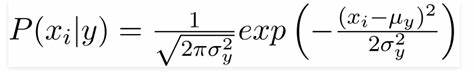

In [27]:
def probability_flower_type(x, mean, std):
    exponent = np.exp(-((x - mean) ** 2) / (2 * (std ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

def GaussianNB(x, mean_values, std_values):
    sl = x[0]
    sw = x[1]
    pl = x[2]
    pw = x[3]

    prob_setosa = (
        probability_flower_type(sl, mean_values['sepal_length']['setosa'], std_values['sepal_length']['setosa']) *
        probability_flower_type(sw, mean_values['sepal_width']['setosa'], std_values['sepal_width']['setosa']) *
        probability_flower_type(pl, mean_values['petal_length']['setosa'], std_values['petal_length']['setosa']) *
        probability_flower_type(pw, mean_values['petal_width']['setosa'], std_values['petal_width']['setosa'])
    )

    prob_versicolor = (
        probability_flower_type(sl, mean_values['sepal_length']['versicolor'], std_values['sepal_length']['versicolor']) *
        probability_flower_type(sw, mean_values['sepal_width']['versicolor'], std_values['sepal_width']['versicolor']) *
        probability_flower_type(pl, mean_values['petal_length']['versicolor'], std_values['petal_length']['versicolor']) *
        probability_flower_type(pw, mean_values['petal_width']['versicolor'], std_values['petal_width']['versicolor'])
    )

    prob_virginica = (
        probability_flower_type(sl, mean_values['sepal_length']['virginica'], std_values['sepal_length']['virginica']) *
        probability_flower_type(sw, mean_values['sepal_width']['virginica'], std_values['sepal_width']['virginica']) *
        probability_flower_type(pl, mean_values['petal_length']['virginica'], std_values['petal_length']['virginica']) *
        probability_flower_type(pw, mean_values['petal_width']['virginica'], std_values['petal_width']['virginica'])
    )

    print("Probability Setosa:", prob_setosa)
    print("Probability Versicolor:", prob_versicolor)
    print("Probability Virginica:", prob_virginica)

    if prob_setosa > prob_versicolor:
        if prob_setosa > prob_virginica:
            print("Flower type is Setosa")
        else:
            print("Flower type is Virginica")
    elif prob_versicolor > prob_virginica:
        print("Flower type is Versicolor")
    else:
        print("Flower type is Virginica")


# 5. Test the code / Model

In [28]:
sample = [5.0,3.6,1.4,0.2]
GaussianNB(sample,mean_values,std_values)

Probability Setosa: 7.767018352121847
Probability Versicolor: 8.108394935924969e-18
Probability Virginica: 7.082166414611929e-25
Flower type is Setosa


# 6. Conclusion
1. It assumes that each feature is independent
2. For Numerical Normaly distributed data - Numerical inputs